In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [194]:
df = pd.read_pickle("network_data_polymer.pickle")
df.head()

,id,time,mean_degree,std_degree,degree_sequence,largest_domain,domain_lengths,node_connectivity
0,00321,1,2.093023,1.206840,"[6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",124,"[124, 2, 5, 5, 3, 6, 2, 4, 4, 3, 2, 3, 2, 2, 2...",0
1,00321,2,2.140351,1.196074,"[7, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, ...",133,"[133, 2, 2, 4, 2, 2, 3, 3, 8, 3, 2, 2, 2, 3]",0
2,00321,3,2.059172,1.123731,"[6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",57,"[57, 42, 2, 7, 19, 2, 2, 4, 4, 3, 3, 8, 4, 2, ...",0
3,00321,4,2.128655,1.116515,"[5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",104,"[104, 2, 31, 2, 2, 4, 3, 5, 3, 6, 2, 2, 2, 3]",0
4,00321,5,2.070588,1.145716,"[6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, ...",44,"[44, 40, 2, 7, 25, 4, 2, 14, 2, 4, 4, 3, 5, 3,...",0


In [196]:
df_param = pd.read_csv("parameters.txt", delim_whitespace=True, dtype='str')
print(df_param.head())
df_param.rename(columns = {'ID':'id'}, inplace=True)
df_param = df_param.astype({'N': float, 'rho':float, 'id':str,'kb': float, 'plink':float, 'epsilon':float})
Nmax=51000

df_param['Nparticles'] = (Nmax*df_param.rho)/df_param.N


      ID   N     kb  rho plink epsilon pstart
0  00462  30  3000.  0.2   0.1      1.  00001
1  00463  30  3000.  0.2   0.1     1.5  00001
2  00464  30  3000.  0.2   0.1      2.  00001
3  00465  30  3000.  0.2   0.1      3.  00021
4  00466  30  3000.  0.2   0.1      5.  00021


In [197]:
dg = pd.merge(df,df_param, on='id')
dg = dg.astype({'id':str, 'time': int, 'N': float, 'kb': float, 
                'plink':float, 
                'rho':float, 'epsilon':float, 
                'largest_domain':float, 'node_connectivity':int, 'pstart':str })



In [198]:
dg['percentage_largest'] = dg.largest_domain/dg.Nparticles

In [199]:
dg.head(10)

,id,time,mean_degree,std_degree,degree_sequence,largest_domain,domain_lengths,node_connectivity,N,kb,rho,plink,epsilon,pstart,Nparticles,percentage_largest
0,00321,1,2.093023,1.206840,"[6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",124.0,"[124, 2, 5, 5, 3, 6, 2, 4, 4, 3, 2, 3, 2, 2, 2...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.486275
1,00321,2,2.140351,1.196074,"[7, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, ...",133.0,"[133, 2, 2, 4, 2, 2, 3, 3, 8, 3, 2, 2, 2, 3]",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.521569
2,00321,3,2.059172,1.123731,"[6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",57.0,"[57, 42, 2, 7, 19, 2, 2, 4, 4, 3, 3, 8, 4, 2, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.223529
3,00321,4,2.128655,1.116515,"[5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",104.0,"[104, 2, 31, 2, 2, 4, 3, 5, 3, 6, 2, 2, 2, 3]",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.407843
4,00321,5,2.070588,1.145716,"[6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, ...",44.0,"[44, 40, 2, 7, 25, 4, 2, 14, 2, 4, 4, 3, 5, 3,...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.172549
5,00321,6,2.131737,1.176369,"[6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",88.0,"[88, 3, 7, 28, 4, 2, 3, 6, 4, 3, 5, 3, 2, 2, 2...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.345098
6,00321,7,2.011494,1.139613,"[7, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",62.0,"[49, 3, 62, 2, 5, 4, 2, 12, 2, 4, 4, 3, 5, 2, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.243137
7,00321,8,2.011628,1.146219,"[7, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",56.0,"[56, 49, 2, 12, 6, 2, 4, 2, 2, 4, 4, 3, 5, 3, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.219608
8,00321,9,2.167665,1.187019,"[6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, ...",93.0,"[93, 2, 35, 7, 4, 2, 4, 3, 2, 3, 3, 2, 2, 2, 3]",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.364706
9,00321,10,2.134831,1.219606,"[6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, ...",130.0,"[130, 2, 2, 7, 4, 2, 2, 3, 3, 4, 3, 2, 2, 2, 2...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0,0.509804


In [97]:
dh = pd.DataFrame({'mean_percentage_largest' : dg.groupby('id').percentage_largest.mean(),
                  'std_percentage_largest' : dg.groupby('id').percentage_largest.std()}).reset_index()

In [98]:
## plot energy 
dh = pd.merge(dh,df_param, on='id')




In [89]:
dh = dh[(dh.plink == 0.1) & (dh.kb==30) & (dh.rho == 0.2) & (dh.N==30)]

In [92]:
arr= dh[['mean_percentage_largest','std_percentage_largest','epsilon']].values


<ErrorbarContainer object of 3 artists>

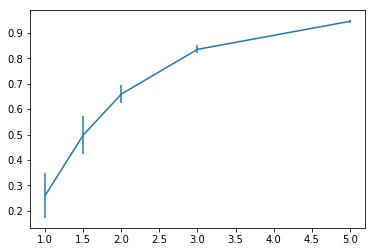

In [95]:
plt.errorbar(arr[:,2],arr[:,0],arr[:,1])

In [ ]:
dh = pd.DataFrame({'mean_percentage_largest' : dg.groupby('id').percentage_largest.mean(),
                  'std_percentage_largest' : dg.groupby('id').percentage_largest.std()}).reset_index()
dh = pd.merge(dh,df_param, on='id')

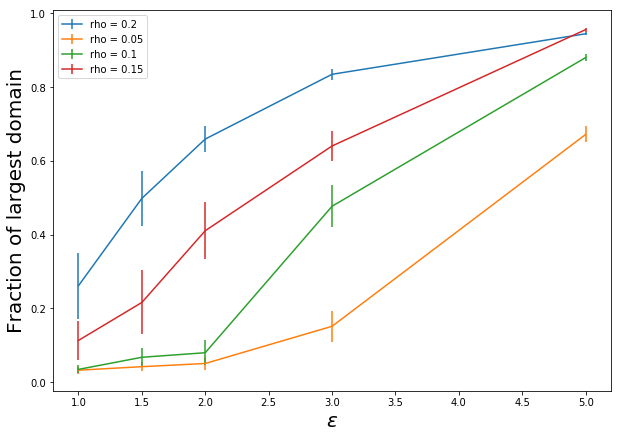

In [121]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xlabel("$\epsilon$", size=20)
plt.ylabel("Fraction of largest domain", size=20)

for rho_i in dh.rho.unique():
    ds = dh[(dh.plink == 0.1) & (dh.kb==30) & (dh.rho == rho_i) & (dh.N==30)]
    arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
    arr = arr[arr[:, 2].argsort()]
    
    plt.errorbar(arr[:,2],arr[:,0],arr[:,1], label='rho = {}'.format(rho_i))

plt.legend(loc='best')

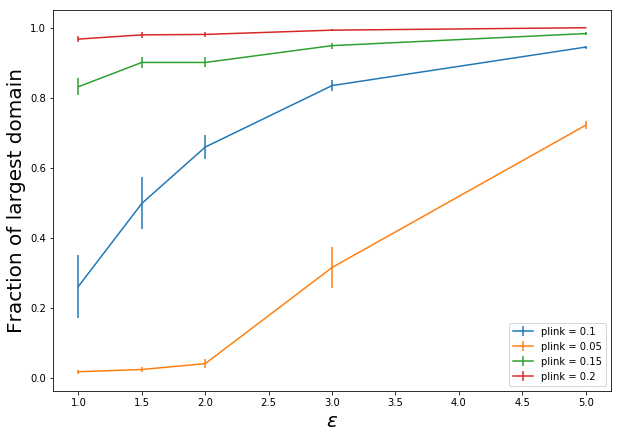

In [122]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xlabel("$\epsilon$", size=20)
plt.ylabel("Fraction of largest domain", size=20)

for pli in dh.plink.unique():
    ds = dh[(dh.plink == pli) & (dh.kb==30) & (dh.rho == 0.2) & (dh.N==30)]
    arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
    arr = arr[arr[:, 2].argsort()]
    
    plt.errorbar(arr[:,2],arr[:,0],arr[:,1], label='plink = {}'.format(pli))

plt.legend(loc='best')

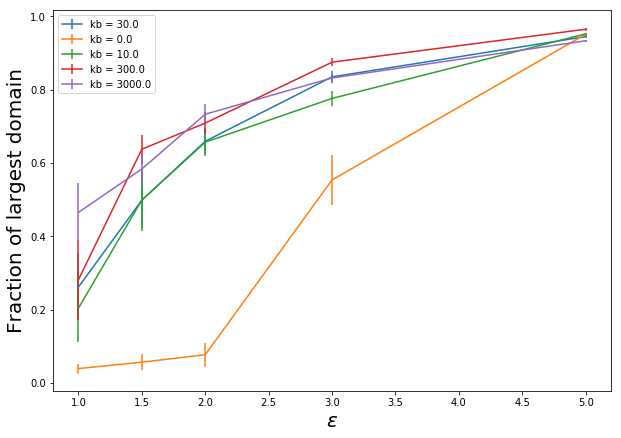

In [124]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xlabel("$\epsilon$", size=20)
plt.ylabel("Fraction of largest domain", size=20)

for kbi in dh.kb.unique():
    ds = dh[(dh.plink == 0.1) & (dh.kb==kbi) & (dh.rho == 0.2) & (dh.N==30)]
    arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
    arr = arr[arr[:, 2].argsort()]
    
    plt.errorbar(arr[:,2],arr[:,0],arr[:,1], label='kb = {}'.format(kbi))

plt.legend(loc='best')

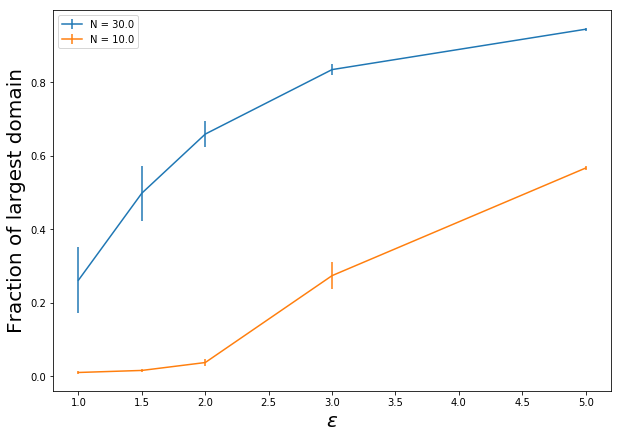

In [125]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xlabel("$\epsilon$", size=20)
plt.ylabel("Fraction of largest domain", size=20)

for ni in dh.N.unique():
    ds = dh[(dh.plink == 0.1) & (dh.kb==30) & (dh.rho == 0.2) & (dh.N==ni)]
    arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
    arr = arr[arr[:, 2].argsort()]
    
    plt.errorbar(arr[:,2],arr[:,0],arr[:,1], label='N = {}'.format(ni))

plt.legend(loc='best')

In [148]:
di = pd.DataFrame({"degree_sequence": dg.groupby('id').degree_sequence.apply(list)}).reset_index()
di.degree_sequence = di.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
di = pd.merge(di,df_param, on='id')

,id,degree_sequence,N,kb,rho,plink,epsilon,pstart,Nparticles
0,00111,"[5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",30.0,30.0,0.2,0.1,1.0,00021,340.0
1,00112,"[7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, ...",30.0,30.0,0.2,0.1,1.5,00021,340.0
2,00113,"[18, 12, 11, 10, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7,...",30.0,30.0,0.2,0.1,2.0,00081,340.0
3,00114,"[15, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 1...",30.0,30.0,0.2,0.1,3.0,00041,340.0
4,00115,"[27, 24, 23, 23, 22, 22, 21, 21, 21, 21, 20, 2...",30.0,30.0,0.2,0.1,5.0,00061,340.0
...,...,...,...,...,...,...,...,...,...
64,00462,"[7, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, ...",30.0,3000.0,0.2,0.1,1.0,00001,340.0
65,00463,"[6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",30.0,3000.0,0.2,0.1,1.5,00001,340.0
66,00464,"[9, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, ...",30.0,3000.0,0.2,0.1,2.0,00001,340.0
67,00465,"[15, 14, 13, 13, 12, 12, 11, 11, 10, 10, 10, 9...",30.0,3000.0,0.2,0.1,3.0,00021,340.0


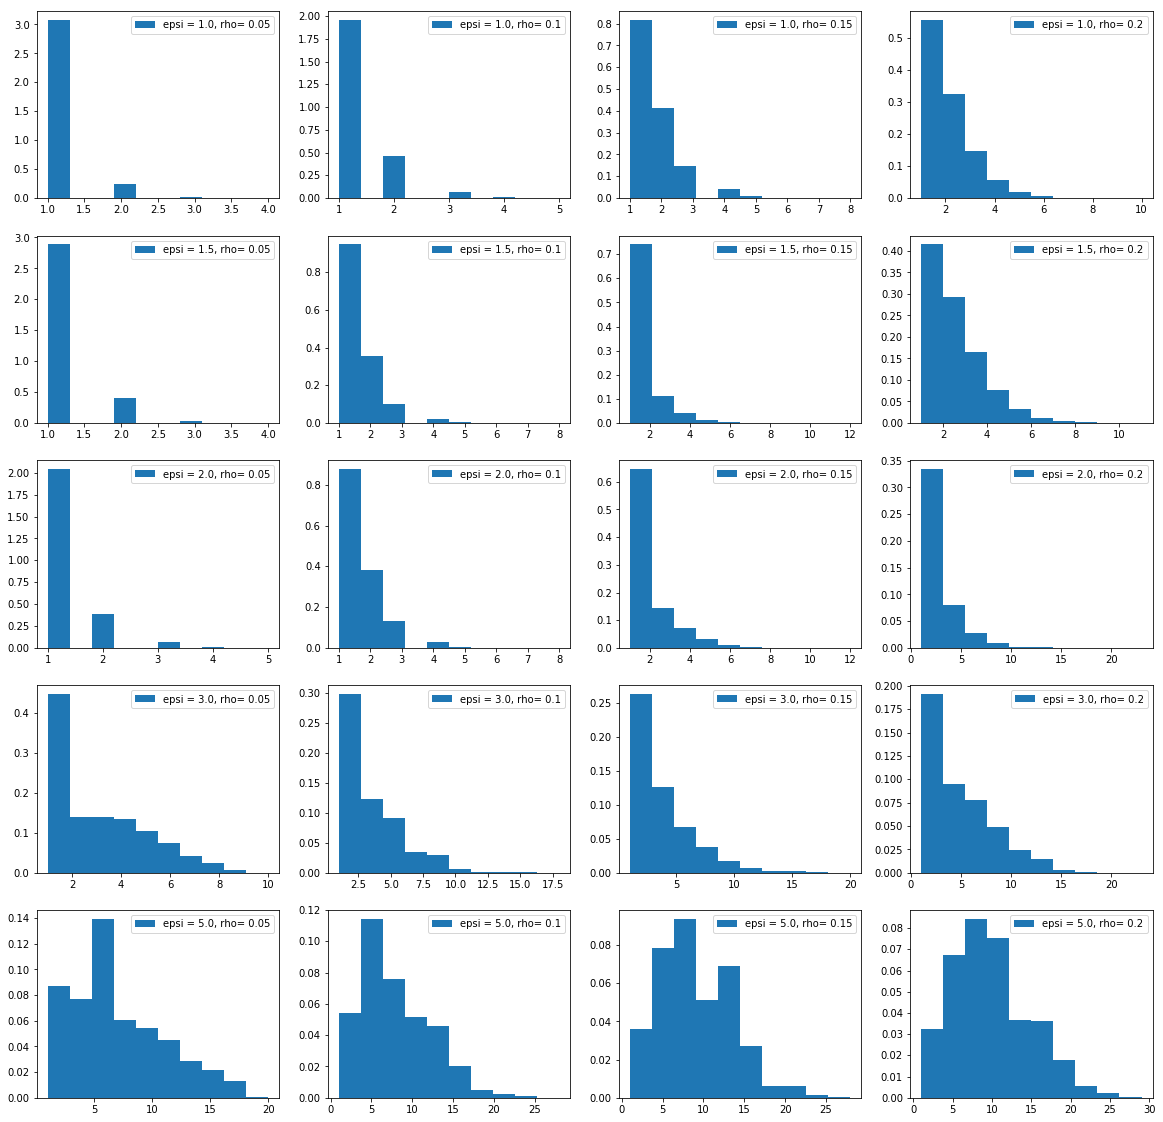

In [158]:
fig, ax = plt.subplots(len(di.epsilon.unique()), len(di.rho.unique()), figsize=(20,20))

for xi, eps_i in enumerate(sorted(di.epsilon.unique())):
    for yi, rho_i in enumerate(sorted(dh.rho.unique())):

        dl = di[(di.plink == 0.1) & (di.kb==30) & (di.rho == rho_i) & (di.N==30) & (di.epsilon == eps_i)]
        arr= dl['degree_sequence'].values
        ax[xi,yi].hist(arr, density=True, label="epsi = {}, rho= {}".format(eps_i,rho_i))
        ax[xi,yi].legend()

In [261]:
def parse_file(file):
    df = pd.read_pickle(file)
    df_param = pd.read_csv("parameters.txt", delim_whitespace=True, dtype='str')
    df_param.rename(columns = {'ID':'id'}, inplace=True)
    df_param = df_param.astype({'N': float, 'rho':float, 'id':str,'kb': float, 'plink':float, 'epsilon':float})
    Nmax=51000

    #df_param['Nparticles'] = (Nmax*df_param.rho)/df_param.N
    df_param['Nparticles'] = (Nmax*df_param.rho)
    
    df = pd.merge(df,df_param, on='id')
    df = df.astype({'id':str, 'time': int, 'N': float, 'kb': float, 
                'plink':float, 
                'rho':float, 'epsilon':float, 
                'largest_domain':float, 'node_connectivity':int, 'pstart':str })
    
    return df,df_param


def get_percolation(df,df_param, x):
    
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df = pd.DataFrame({'mean_percentage_largest' : df.groupby('id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('id').percentage_largest.std()}).reset_index()
    df = pd.merge(df,df_param, on='id')
    
    
    fig, ax = plt.subplots(figsize=(10,7))
    plt.xlabel("$\epsilon$", size=20)
    plt.ylabel("Fraction of largest domain", size=20)

    for x_i in dh[x].unique():
        ds = df[df[x] == x_i]
        for key, val in std_cond.items():
            if key!=x:
                ds = ds[ds[key] == val]
        
        arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
        arr = arr[arr[:, 2].argsort()]
    
        plt.errorbar(arr[:,2],arr[:,0],arr[:,1], label='{} = {}'.format(x, x_i))

    plt.legend(loc='best')
    plt.show()
    
def get_degree_histogram(df,df_param,x):
    
    df = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
    df.degree_sequence = df.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df = pd.merge(df,df_param, on='id')
    
    fig, ax = plt.subplots(len(df.epsilon.unique()), len(df[x].unique()), figsize=(20,20))
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    ds = df
    for key, val in std_cond.items():
         if key!=x:
                ds = ds[ds[key] == val]
    
    print(ds.dtypes)
    for lx, eps_i in enumerate(sorted(ds.epsilon.unique())):
        print(ds.epsilon.unique())
        for ly, x_i in enumerate(sorted(ds[x].unique())):
            
            di = ds[(ds[x] == x_i) & (ds.epsilon == eps_i)]
           
            arr= di['degree_sequence'].values
            ax[lx,ly].hist(arr, bins=range(0,np.max(arr)),density=True, label="epsi = {}, {} = {}".format(eps_i,x,x_i))
            ax[lx,ly].legend()
    
    plt.legend()
    plt.show()
    
    
def get_domain_length_histogram(df,df_param,x):
    df = pd.DataFrame({"domain_lengths": df.groupby('id').domain_lengths.apply(list)}).reset_index()
    df.domain_lengths = df.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df = pd.merge(df,df_param, on='id')
    
    fig, ax = plt.subplots(len(df.epsilon.unique()), len(df[x].unique()), figsize=(20,20))
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    ds = df
    for key, val in std_cond.items():
         if key!=x:
                ds = ds[ds[key] == val]
    
    print(ds.dtypes)
    for lx, eps_i in enumerate(sorted(ds.epsilon.unique())):
        print(ds.epsilon.unique())
        for ly, x_i in enumerate(sorted(ds[x].unique())):
            
            di = ds[(ds[x] == x_i) & (ds.epsilon == eps_i)]
           
            arr= di['domain_lengths'].values
            ax[lx,ly].hist(arr, density=True, label="epsi = {}, {} = {}".format(eps_i,x,x_i))
            ax[lx,ly].legend()
    
    plt.legend()
    plt.show()
    

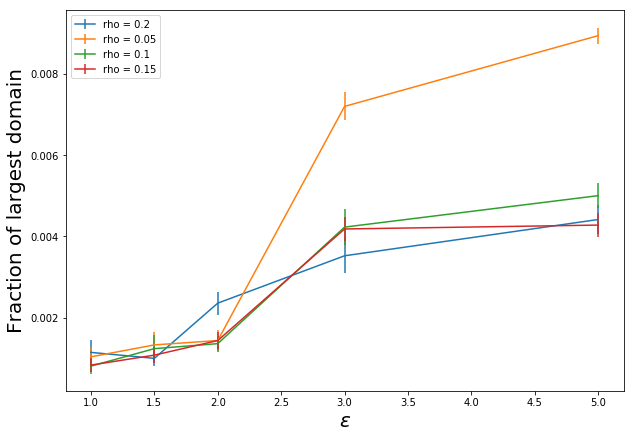

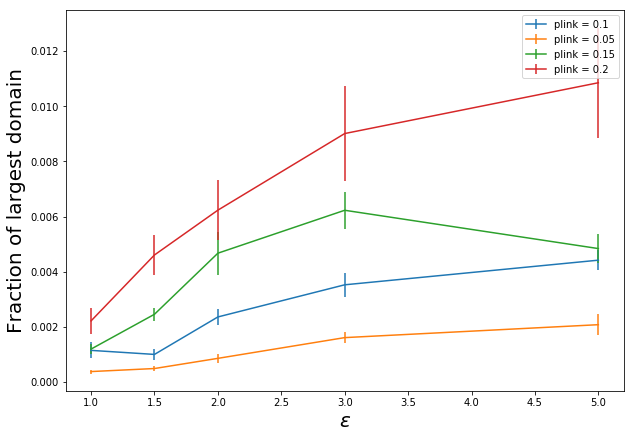

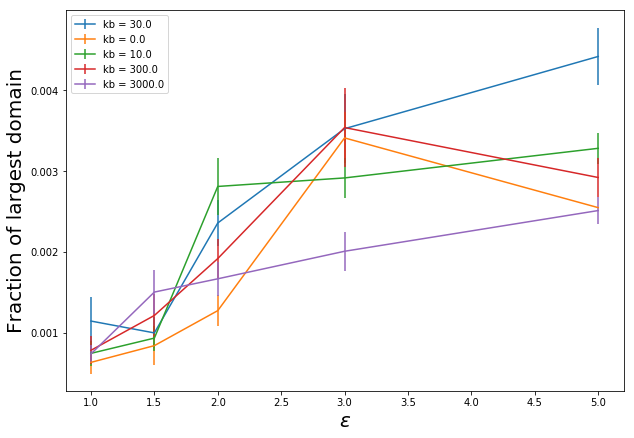

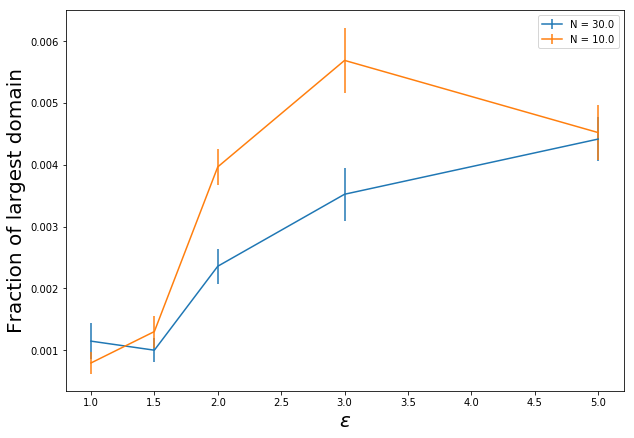

In [233]:
df,df_param = parse_file('network_data_crosslinker.pickle')
get_percolation(df,df_param,'rho')
get_percolation(df,df_param,'plink')
get_percolation(df,df_param, 'kb')
get_percolation(df,df_param, 'N')



id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


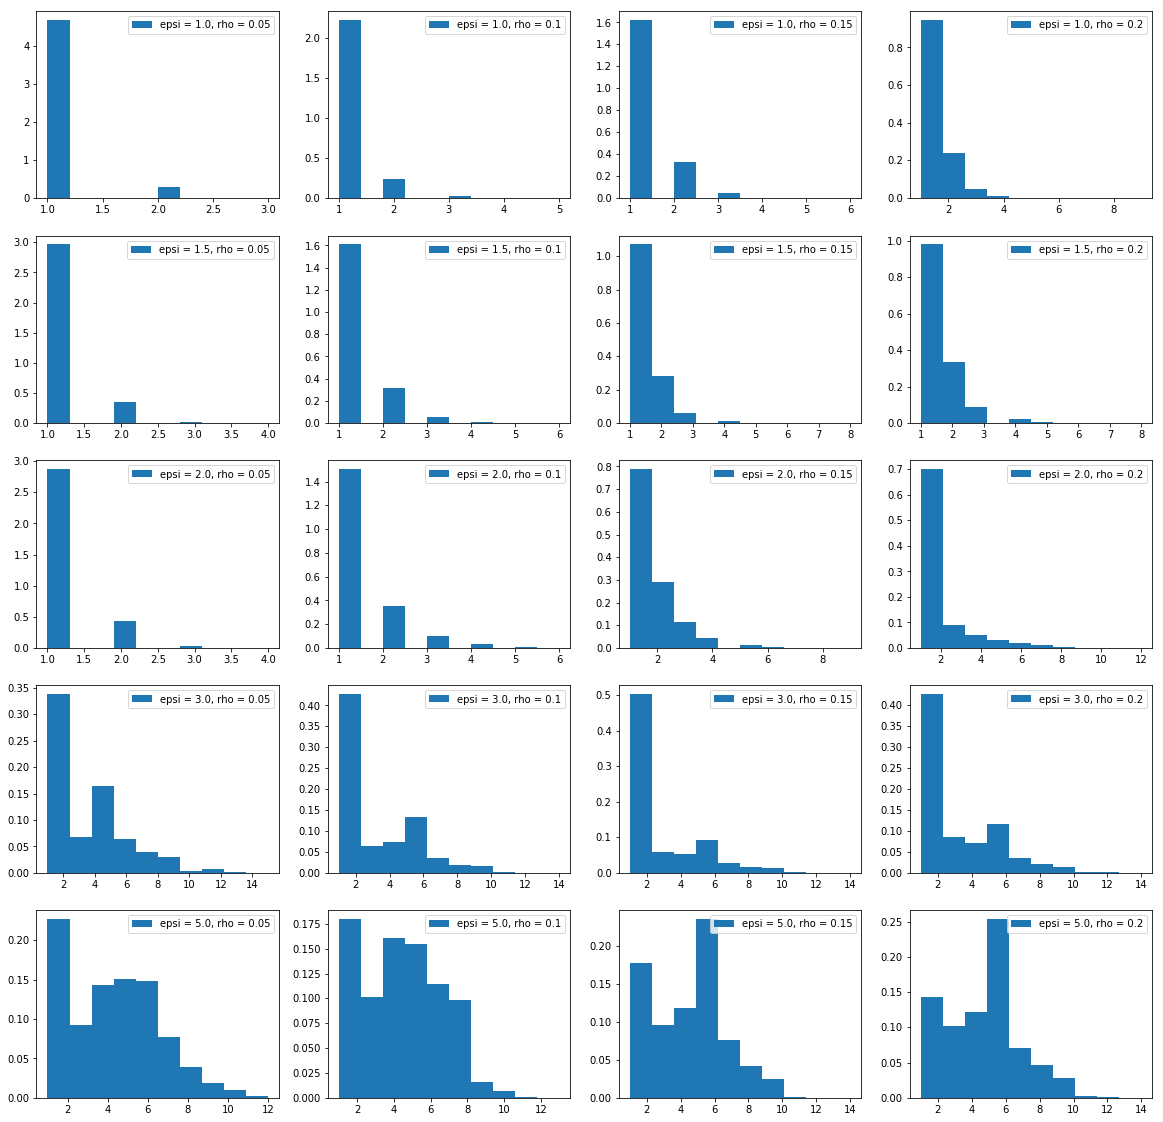

In [231]:
get_degree_histogram(df,df_param,'rho')


id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


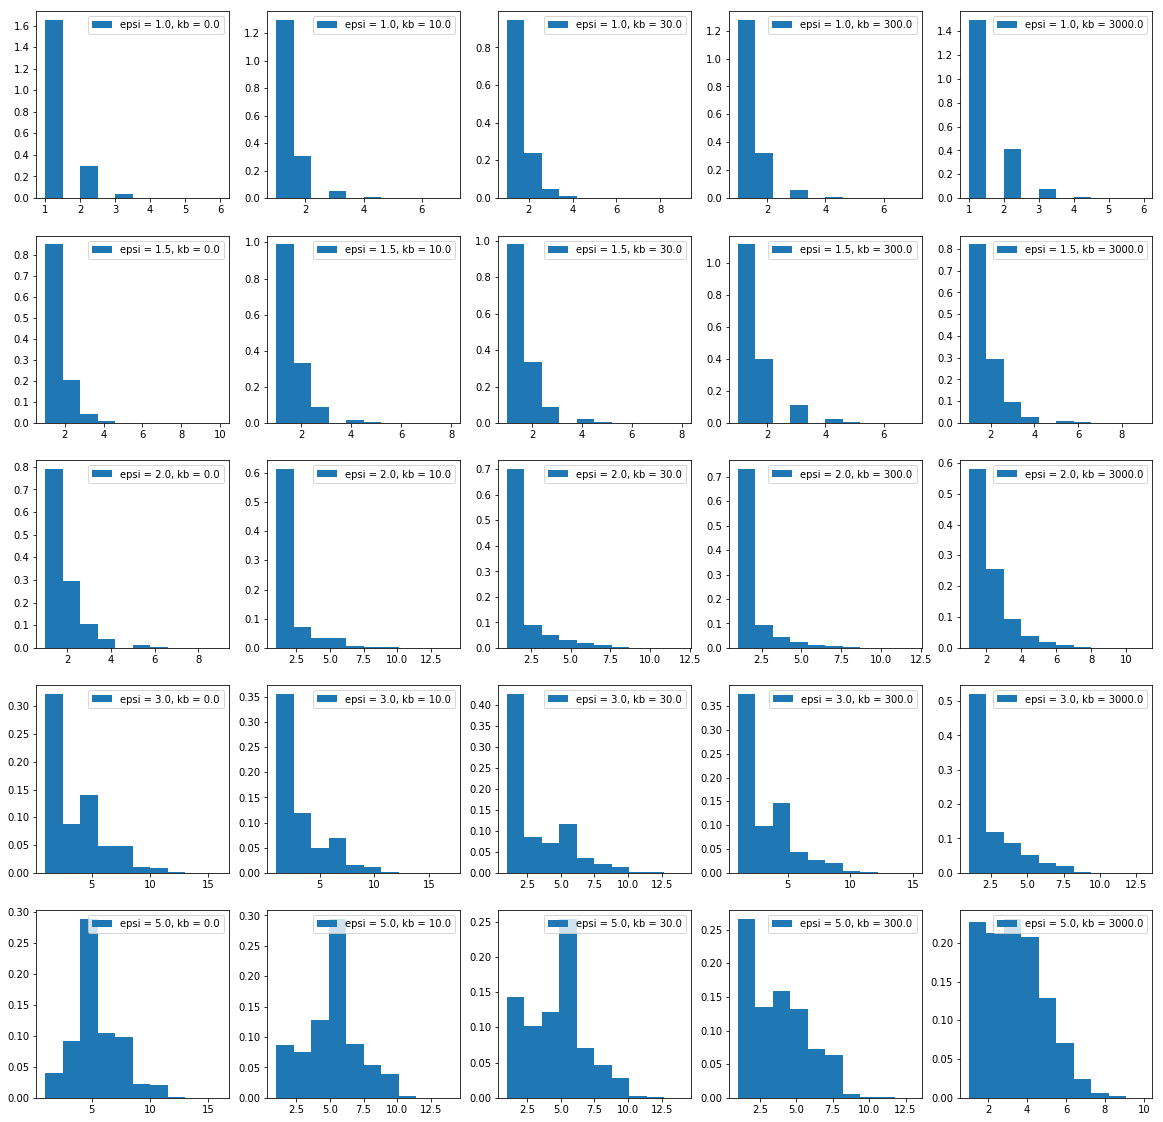

In [228]:
get_degree_histogram(df,df_param,'kb')


id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


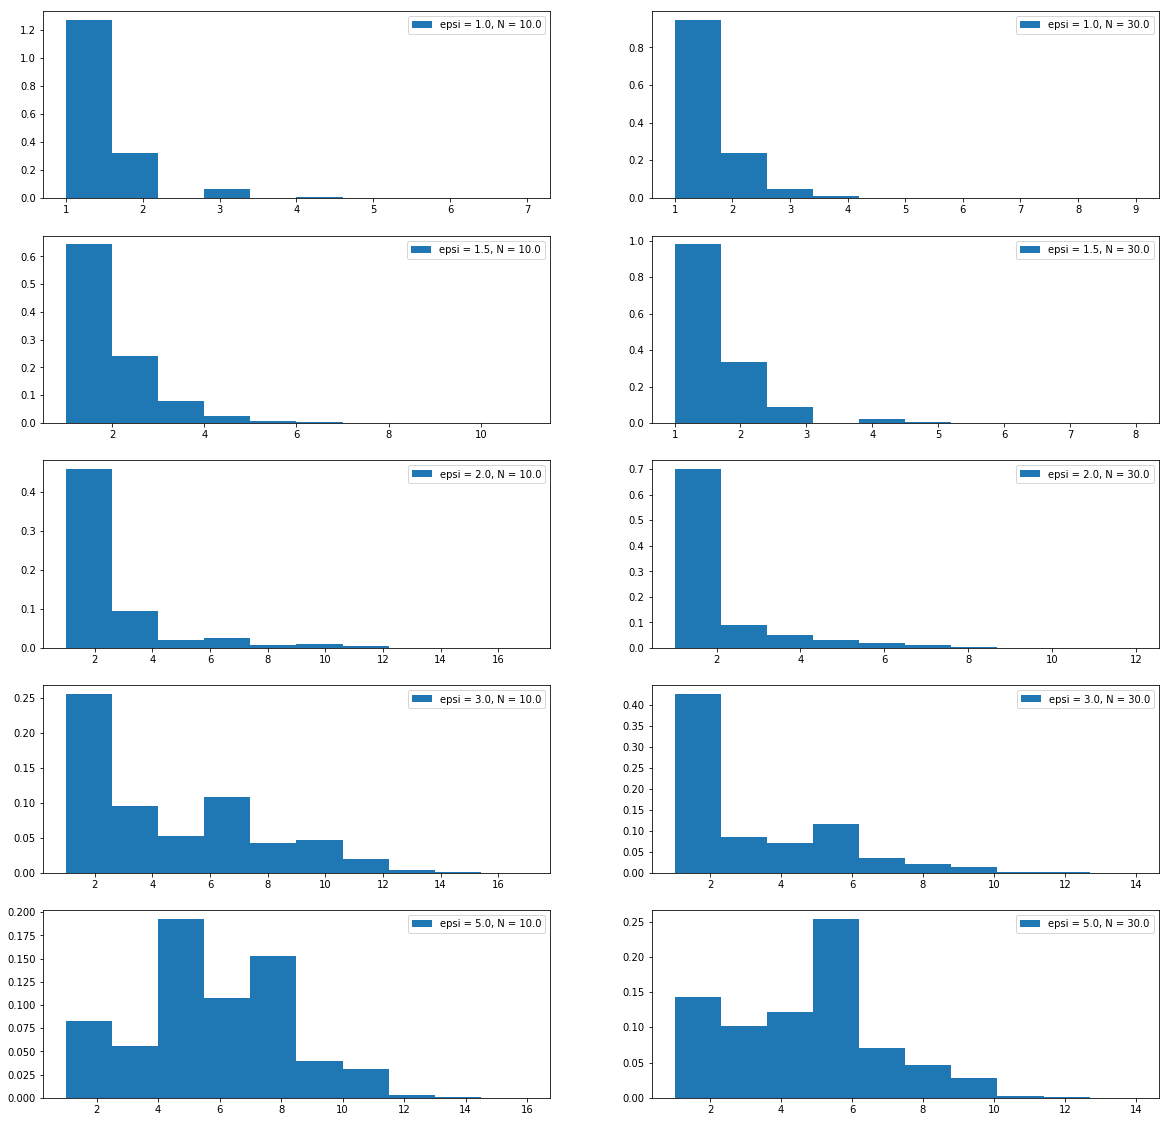

In [229]:
get_degree_histogram(df,df_param,'N')


id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


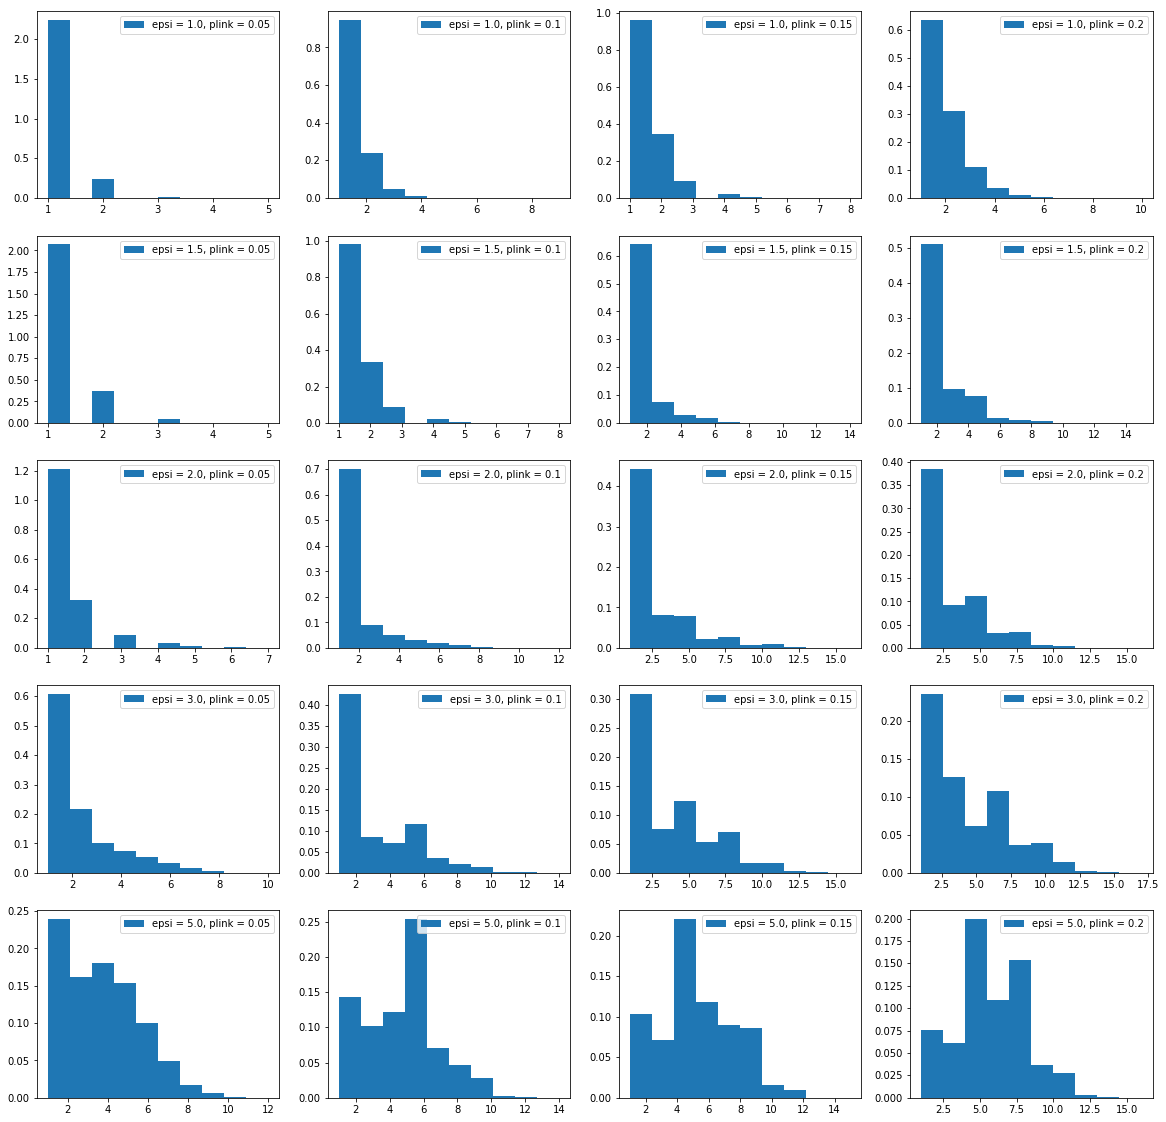

In [230]:
get_degree_histogram(df,df_param,'plink')

#### TODO's
Column: number of linkers in each file
Histogram N crosslinkers per Particle on average as functin of different parameters 

#### pymol todos 
color according to domain 
video of network and video in real space 
color crosslinkers in network 
number of bonded crosslinkers over number of crosslinkers as function of energy and other parameters 

Is this clustering also something that happens in mucus?? (density variation zones) 

Where the crosslinkers sit, determines a lot of the topology 

a.) One thing interesting to find out: what determines the max cluster size of around 175? -- crosscheck scirpt what get calculated there!!! 

b.) Another interesting thing is looking at var in kb: why are flexible chains so much less likely to percolate?
c.) Is epsilon=5 static in cluster size 

d.) Domain size histogram 

e.) What is the next neighbhour condiciton 

f.) what is different to likos, garlea paper 


Idea for network visualzation: also connect crosslinkers on network 
Properties of large crosslinker clusters!


* Look at a full video





In [239]:
dg = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
dg.degree_sequence = dg.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
dg = pd.merge(dg,df_param, on='id')
np.max(dg.degree_sequence.max())

17

AttributeError: 'DataFrame' object has no attribute 'domain_lengths'

In [242]:
df.columns

Index(['id', 'time', 'mean_degree', 'std_degree', 'degree_sequence',
       'largest_domain', 'domain_lengths', 'node_connectivity', 'N', 'kb',
       'rho', 'plink', 'epsilon', 'pstart', 'Nparticles',
       'percentage_largest'],
      dtype='object')

In [255]:
dg = pd.DataFrame({"domain_lengths": df.groupby('id').domain_lengths.apply(list)}).reset_index()
dg.domain_lengths = dg.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
dg = pd.merge(dg,df_param, on='id')
np.max(dg.domain_lengths.max())

175

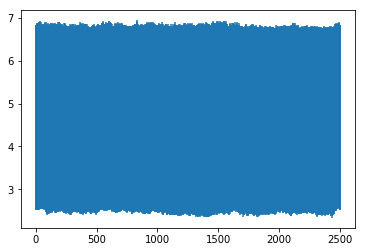

In [245]:
arr = dg[['time','mean_degree','std_degree']].values
plt.errorbar(arr[:,0],arr[:,1],arr[:,2])
plt.show()

id                 object
domain_lengths     object
N                 float64
kb                float64
rho               float64
plink             float64
epsilon           float64
pstart             object
Nparticles        float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


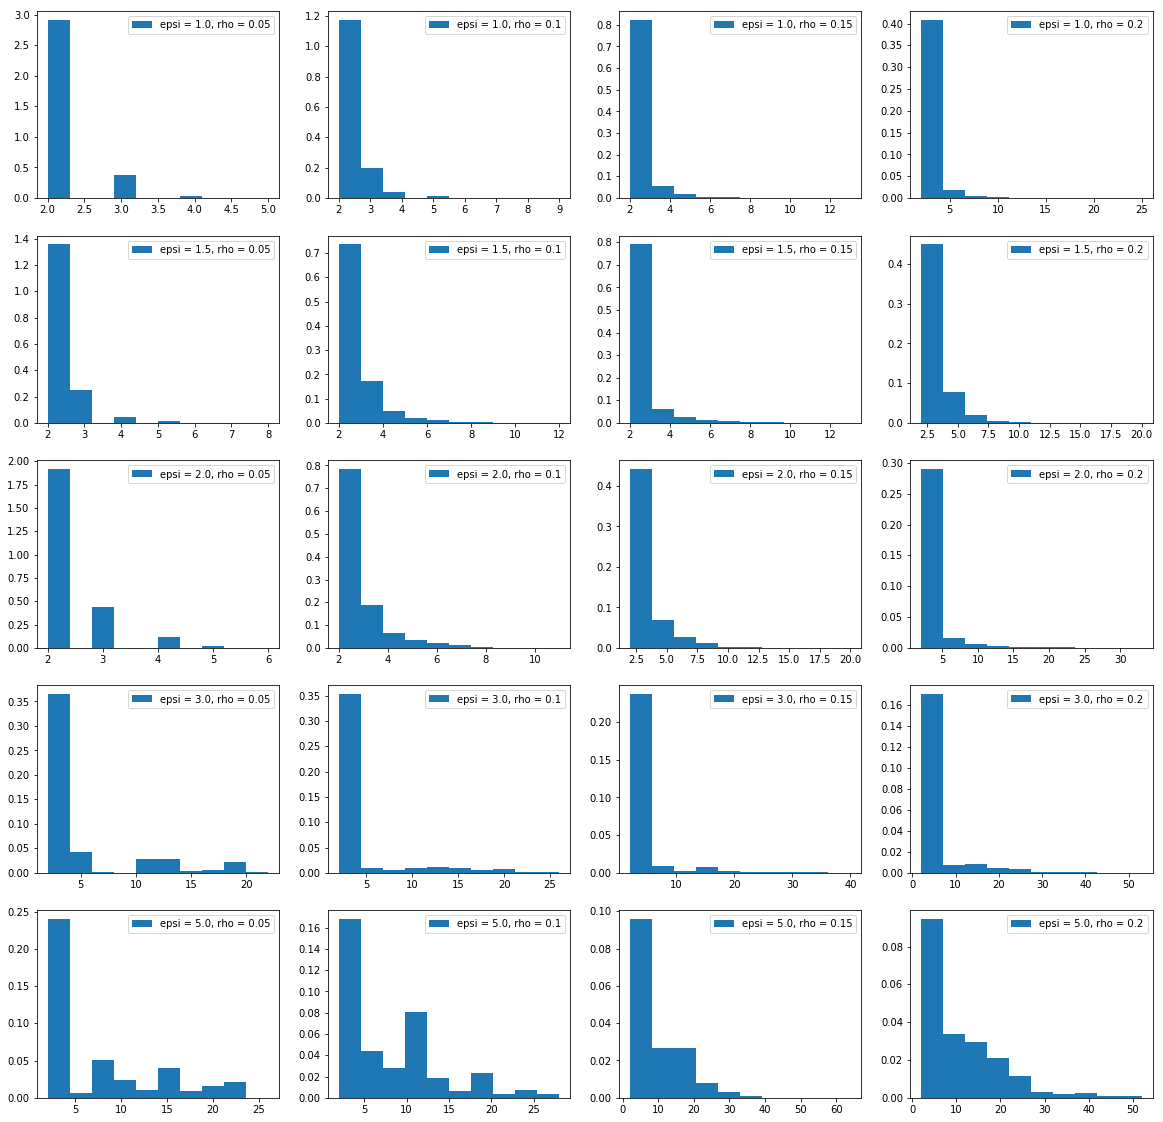

In [262]:
get_domain_length_histogram(df,df_param,'rho')

id                 object
domain_lengths     object
N                 float64
kb                float64
rho               float64
plink             float64
epsilon           float64
pstart             object
Nparticles        float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


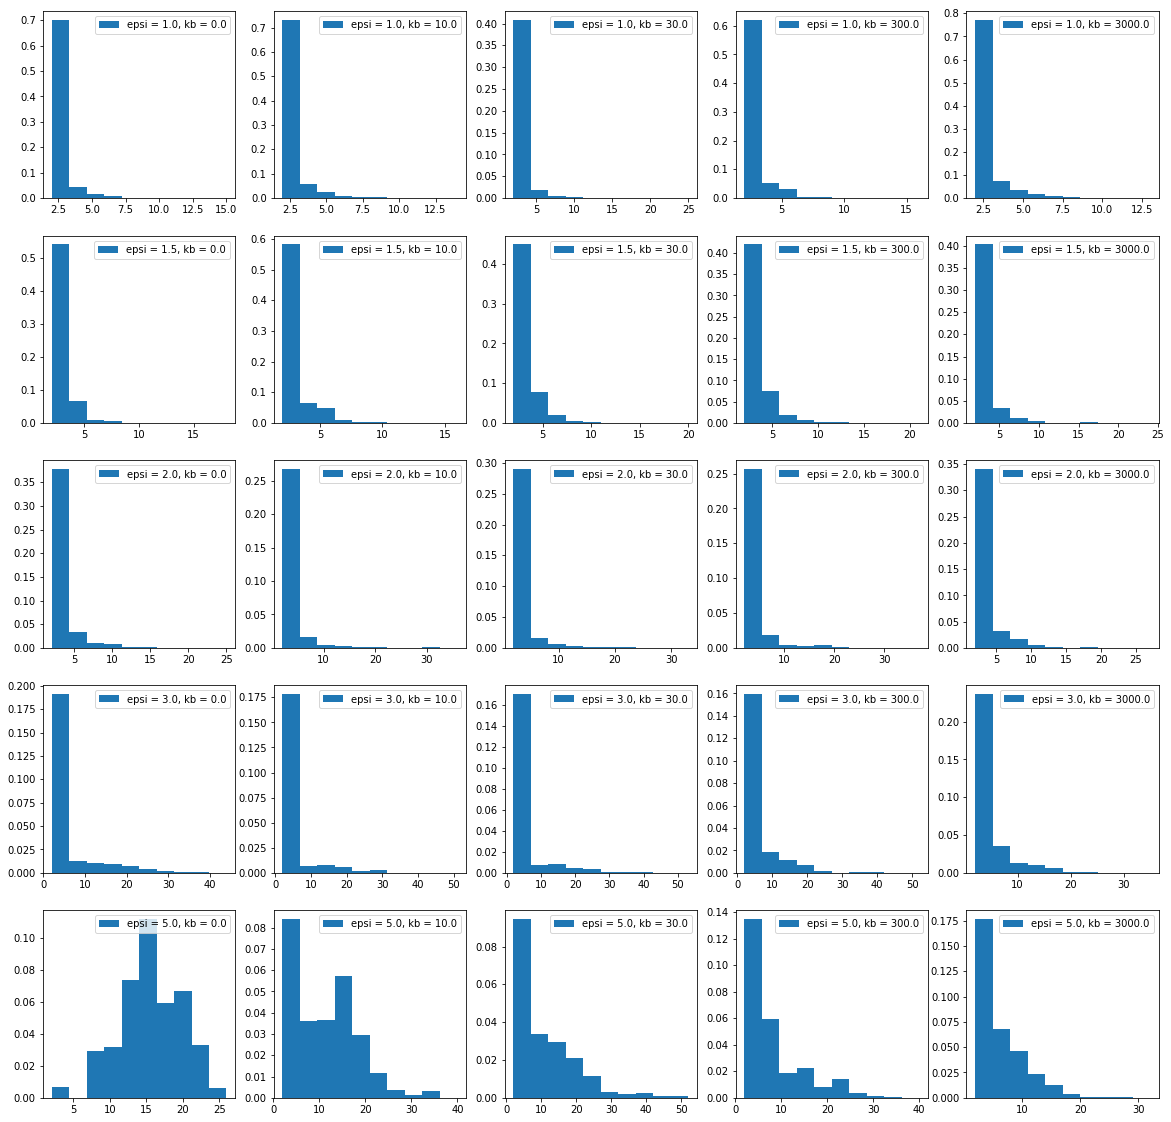

In [263]:
get_domain_length_histogram(df,df_param,'kb')

id                 object
domain_lengths     object
N                 float64
kb                float64
rho               float64
plink             float64
epsilon           float64
pstart             object
Nparticles        float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


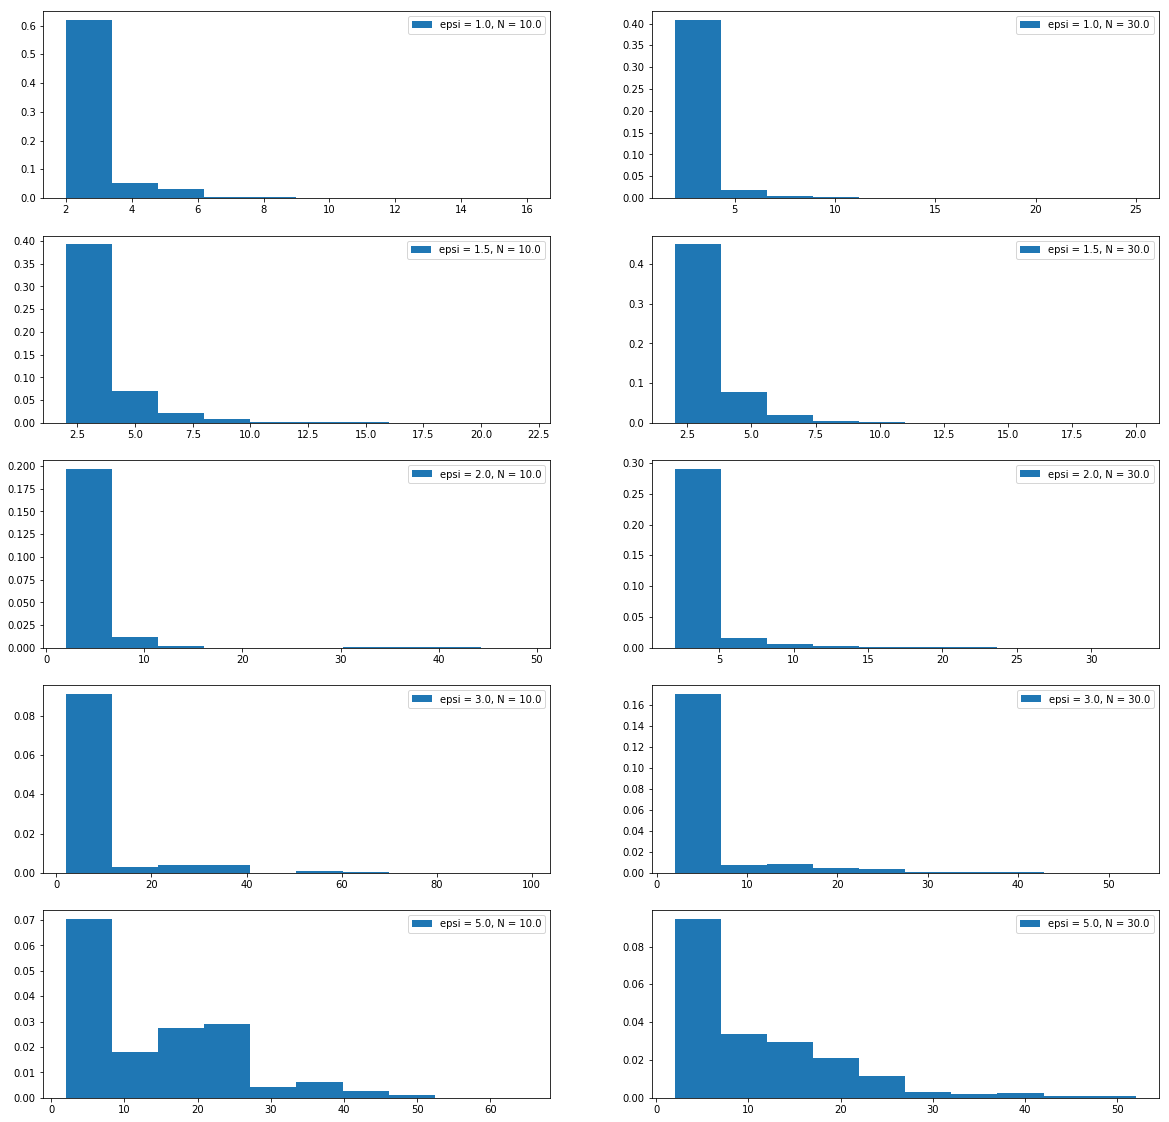

In [264]:
get_domain_length_histogram(df,df_param,'N')

id                 object
domain_lengths     object
N                 float64
kb                float64
rho               float64
plink             float64
epsilon           float64
pstart             object
Nparticles        float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


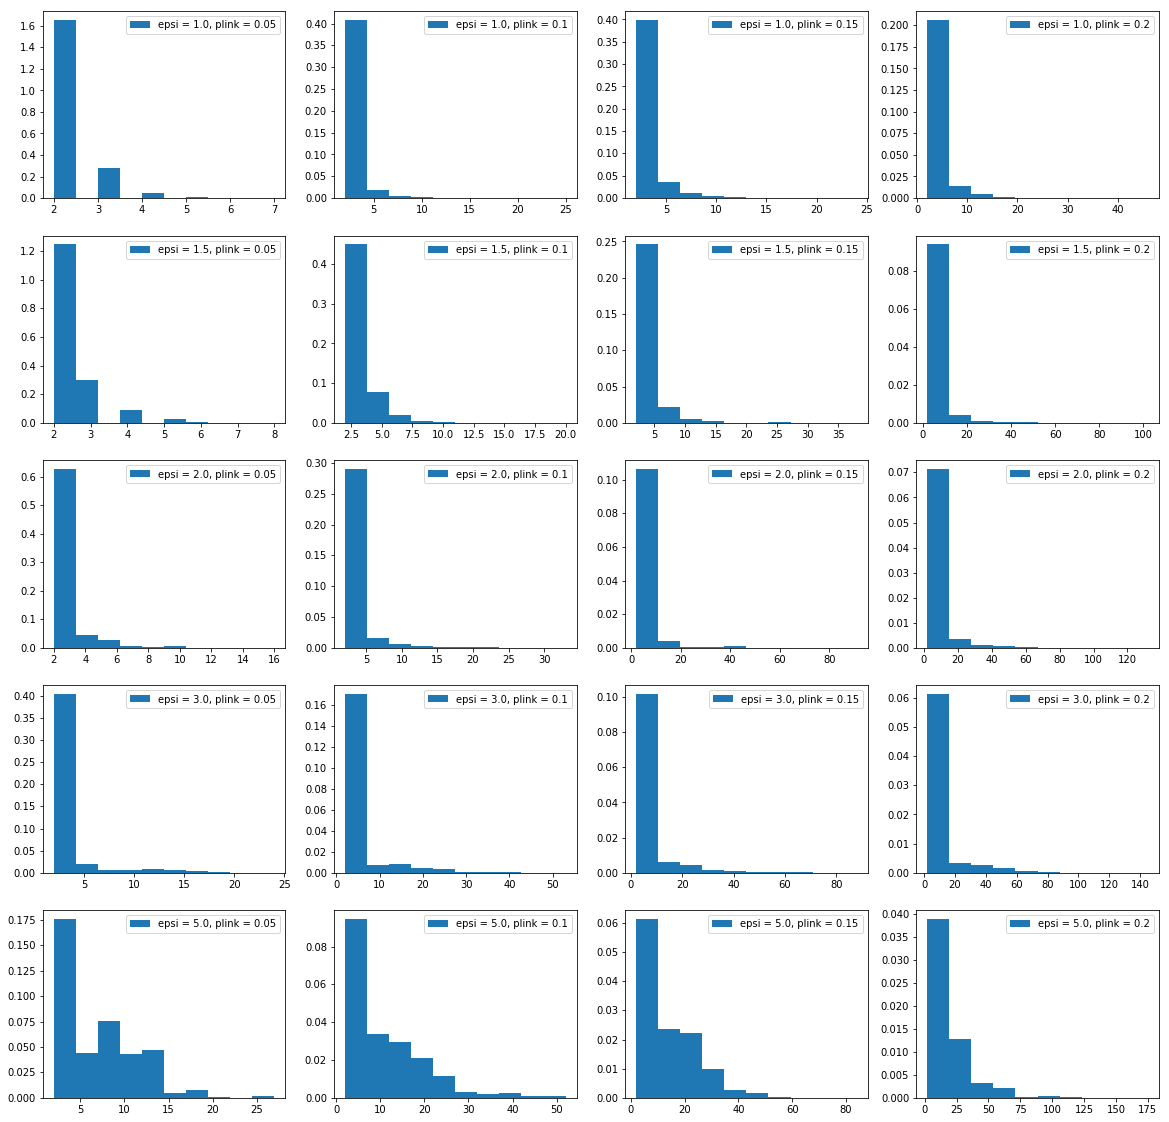

In [265]:
get_domain_length_histogram(df,df_param,'plink')